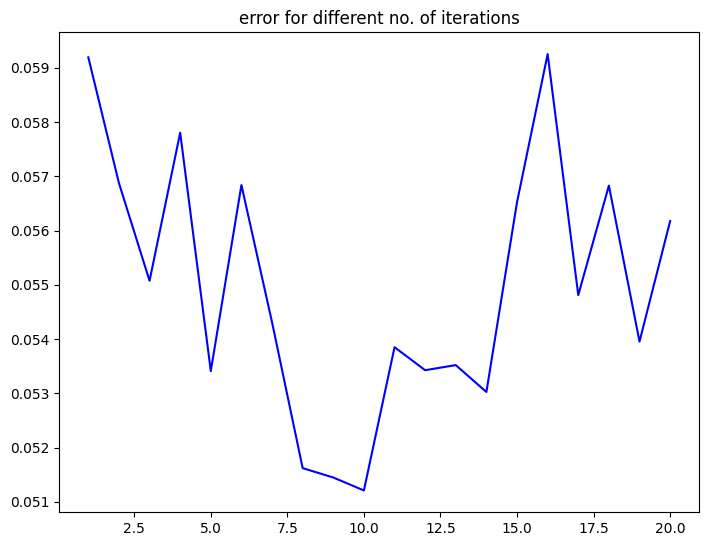

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import SGDRegressor as sgd
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
df = pd.read_csv('salary.csv')
x = df[['salary']]
y = df['experience']
xtrain, xtest, ytrain, ytest = tts(x, y, test_size = 0.3)
error = []
for i in range(20):
    model = sgd(max_iter = 20 + i)
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)
    error.append(mse(ytest, pred))
error = np.array(error)
xaxis = np.arange(1, 21)
plt.title('error for different no. of iterations')
plt.plot(xaxis, error, color= 'blue')
plt.show()
    

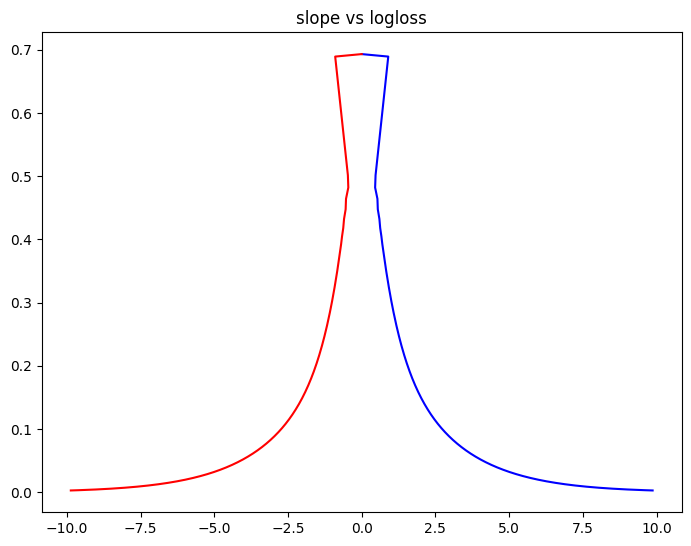

In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

xp = np.array([1, 2, 3, 4, 5])
yp = np.array([0, 0, 1, 1, 1])
xn = np.array([1, 2, 3, 4, 5])
yn = np.array([1, 1, 0, 0, 0])

def calculate(x, y):
    a = 0.0001
    b0, b1, n = 0, 0, len(y)
    logloss = []
    slopes = []
    for i in range(10000):
        b0err, b1err, loss = 0, 0, 0
        for j in range(n):
            z = (b0 * x[j]) + b1
            p = 1 / (1 + np.exp(-z))
            err = (y[j] - p)
            b0err -= err * x[j]
            b1err -= err
            loss += -((y[j] * np.log(p)) + ((1 - y[j]) * np.log(1 - p)))
        slopes.append(b0)
        b0err /= n
        b1err /= n
        loss /= n
        logloss.append(loss)
        b0 = b0 - b0err
        b1 = b1 - b1err
    return slopes, logloss
    
val1, val2 = calculate(xp, yp), calculate(xn, yn)
a1, a2, b1, b2 = np.array(val1[0]), np.array(val1[1]), np.array(val2[0]), np.array(val2[1])
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.title('slope vs logloss')
plt.plot(a1, a2, color= 'blue')
plt.plot(b1, b2, color= 'red')
plt.show()

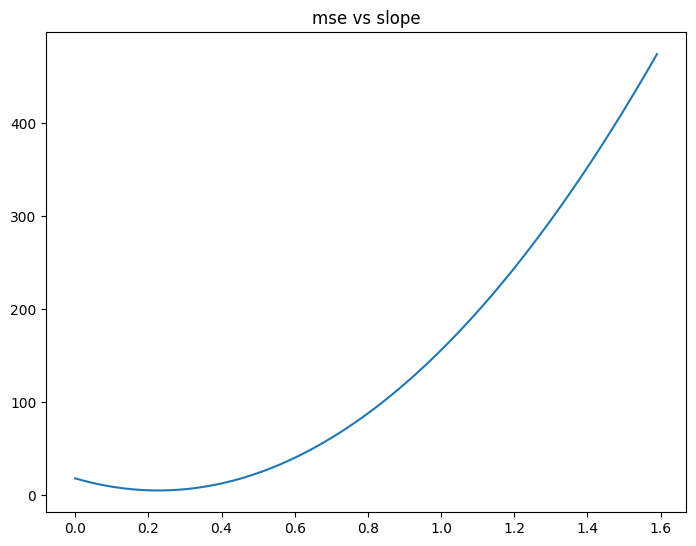

In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('salary.csv')
x = df['salary'].to_numpy()
y = df['experience'].to_numpy()

def mse(b0, b1):
    global x, y
    mse = 0
    for i in range(len(y)):
        mse += (y[i] - (b0 * x[i]) - b1) ** 2
    return mse

err = []
i = 0
while i < 1.6:
    err.append(mse(i, 2))
    i += 0.01
err = np.array(err)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.title('mse vs slope')
plt.plot(np.arange(0, 1.6, 0.01), err)
plt.show()
        

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as mse

df = pd.read_csv('salary.csv')
x = df[['salary']]
y = df['experience']
xtrain, xtest, ytrain, ytest = tts(x, y, test_size = 0.3)
model = lr()
model.fit(xtrain, ytrain)
pred = model.predict(xtest)
print(mse(ytest, pred))

0.20242438972166424


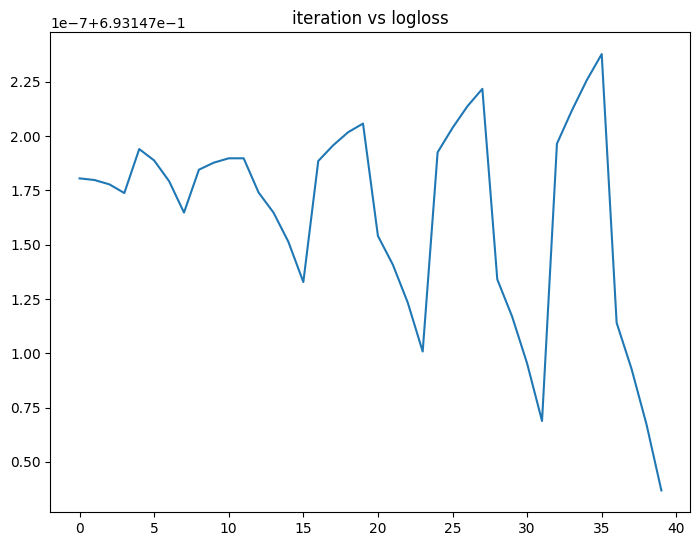

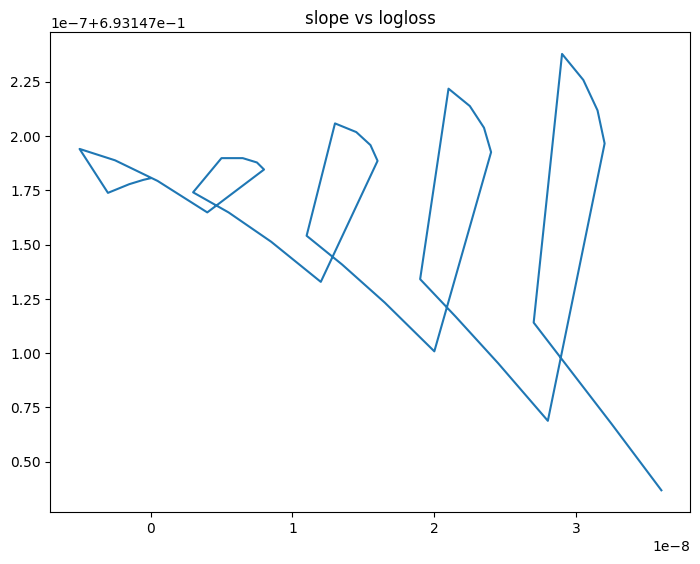

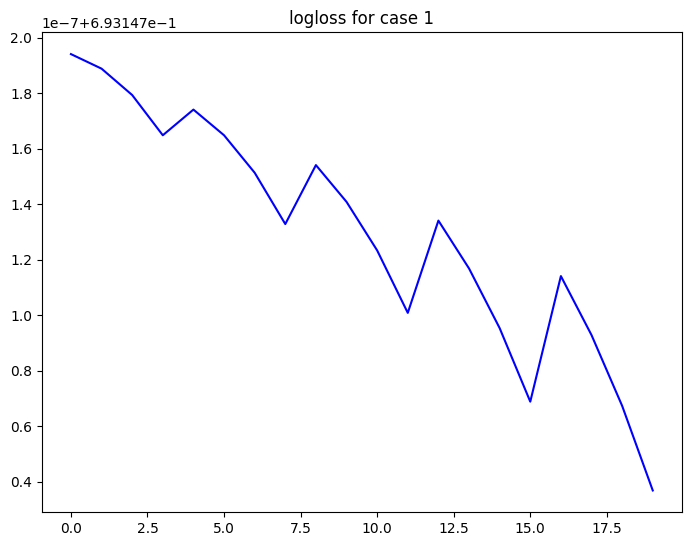

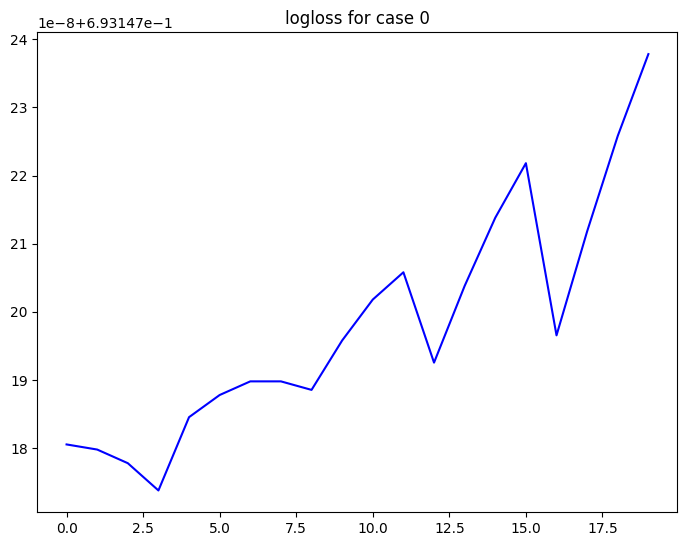

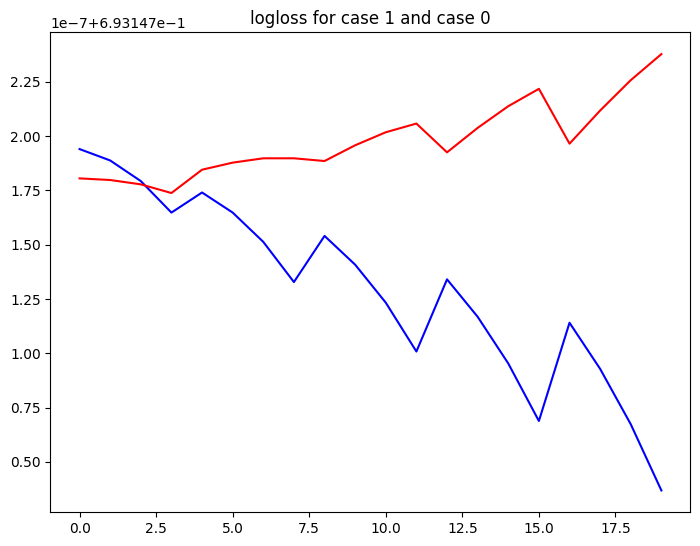

In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('study.csv')
x = df['hours']
y = df['pass']
b0, b1, a = 0, 0, 0.000000001
logloss = []
slope = []
log0, log1 = [], []

for i in range(5):
    for j in range(len(y)):
        z = (b0 * x[j]) + b1
        p = 1 / (1 + np.exp(-z))
        logloss.append(-((y[j] * np.log(p)) + ((1 - y[j]) * np.log(1 - p))))
        slope.append(b0)
        if y[j] == 0:
            log0.append(-np.log(1 - p))
        else:
            log1.append(-np.log(p))
        err = -(y[j] - p)
        b0 = b0 - (a * err * x[j])
        b1 = b1 - (a * err)

logloss = np.array(logloss)
slope = np.array(slope)
log0 = np.array(log0)
log1 = np.array(log1)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.title('iteration vs logloss')
plt.plot(np.arange(0, len(logloss)), logloss)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.title('slope vs logloss')
plt.plot(slope, logloss)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.title('logloss for case 1')
plt.plot(np.arange(0, len(log1)), log1, color= 'blue')
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.title('logloss for case 0')
plt.plot(np.arange(0, len(log0)), log0, color= 'blue')
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.title('logloss for case 1 and case 0')
plt.plot(np.arange(0, len(log1)), log1, color= 'blue')
plt.plot(np.arange(0, len(log1)), log0, color= 'red')


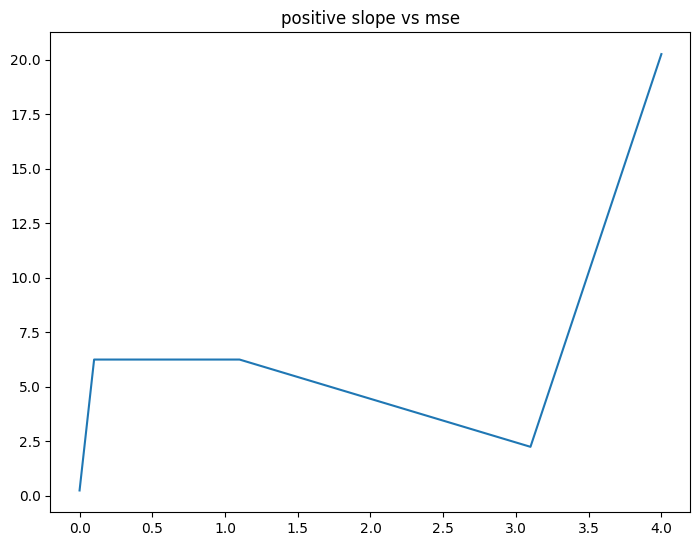

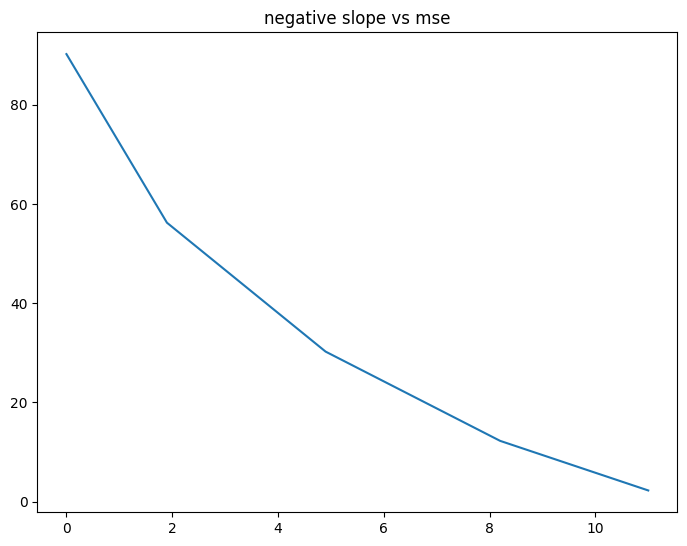

In [87]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

xp = np.array([1, 2, 4, 3, 5])
yp = np.array([1, 3, 3, 2, 5])
xn = np.array([1, 2, 3, 4, 5])
yn = np.array([10, 8, 6, 4, 2])

def plot(x, y):
    mse, slope = [], []
    b0, b1, a = 0, 0, 0.1
    for j in range(1):
        for i in range(len(y)):
            slope.append(b0)
            pred = (b0 * x[i]) + b1
            mse.append((y[i] - p) ** 2)
            err = 2 * (y[i] - p) * (-1)
            b0 = b0 - (a * err * x[i])
            b1 = b1 - (a * err)
    return np.array(slope), np.array(mse)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x, y = plot(xp, yp)
plt.title('positive slope vs mse')
plt.plot(x, y)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.title('negative slope vs mse')
x, y = plot(xn, yn)
plt.plot(x, y)